<a href="https://colab.research.google.com/github/Ayushft/Coursera_Capstone/blob/master/Applied_Data_Science_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the required packages**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Importing the dataset

In [ ]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [ ]:
raw_df = pd.read_csv("drive/My Drive/Data-Collisions.csv",low_memory=False)

In [ ]:
raw_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0.0,0.0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0.0,0.0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0.0,0.0,N


### Performing data operations

In [ ]:
raw_df['SEVERITYCODE'].value_counts()

1    9588
2    4258
Name: SEVERITYCODE, dtype: int64

Since the labels of Severity are in unequal frequency, it needs to be made equal else the predictions will be biased towards the higher frequency label.

In [ ]:
raw_df_major = raw_df[raw_df['SEVERITYCODE']==1]
raw_df_minor = raw_df[raw_df['SEVERITYCODE']==2]

In [ ]:
raw_df_major = raw_df_major.sample(n=4258,random_state=7)
raw_df_major['SEVERITYCODE'].value_counts()

1    4258
Name: SEVERITYCODE, dtype: int64

In [ ]:
equal_df = pd.concat([raw_df_major,raw_df_minor])
equal_df['SEVERITYCODE'].value_counts()

2    4258
1    4258
Name: SEVERITYCODE, dtype: int64

We'll now change the type of date column to "Datetime" format for more usability.

In [ ]:
pd.to_datetime(equal_df.INCDTTM)
equal_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
13089,1,-122.332812,47.605142,16575,30752,30752,1482601,Matched,Block,NaN,MARION ST BETWEEN 3RD AVE AND 4TH AVE,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2004/05/06 00:00:00+00,5/6/2004,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Y,0,Clear,Dry,Daylight,NaN,4127024.0,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
8945,1,-122.301170,47.551000,11197,24877,24877,1779329,Matched,Block,NaN,S ORCAS ST BETWEEN BEACON ER AVE S AND 25TH AVE S,NaN,NaN,1,Property Damage Only Collision,Other,2,0,0,1,2004/05/21 00:00:00+00,5/21/2004 9:30:00 PM,Mid-Block (but intersection related),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,0,Clear,Dry,Dark - Street Lights On,NaN,4142001.0,NaN,50,Fixed object,0.0,0.0,N
9582,1,-122.346267,47.643021,12039,26582,26582,1783659,Matched,Block,NaN,6TH AVE N BETWEEN HALLADAY ST AND RAYE LOWER ST,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2004/11/17 00:00:00+00,11/17/2004 6:10:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Dry,Dark - Street Lights On,NaN,4322015.0,NaN,14,From same direction - both going straight - on...,0.0,0.0,N
9652,1,-122.301179,47.618286,12132,25839,25839,1198376,Matched,Block,NaN,24TH AVE BETWEEN E HOWELL ST AND E DENNY WAY,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2004/11/07 00:00:00+00,11/7/2004,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,0,Unknown,Unknown,Unknown,NaN,4312004.0,NaN,32,One parked--one moving,0.0,0.0,N
314,1,-122.313130,47.661269,354,320864,322364,E937614,Matched,Intersection,27062.0,UNIVERSITY WAY NE AND NE 45TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/07/07 00:00:00+00,7/7/2019 8:16:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N


### Visualizing data to gain insights

We will now visualize the relation between weather condition and number of severe and non-severe accidents.

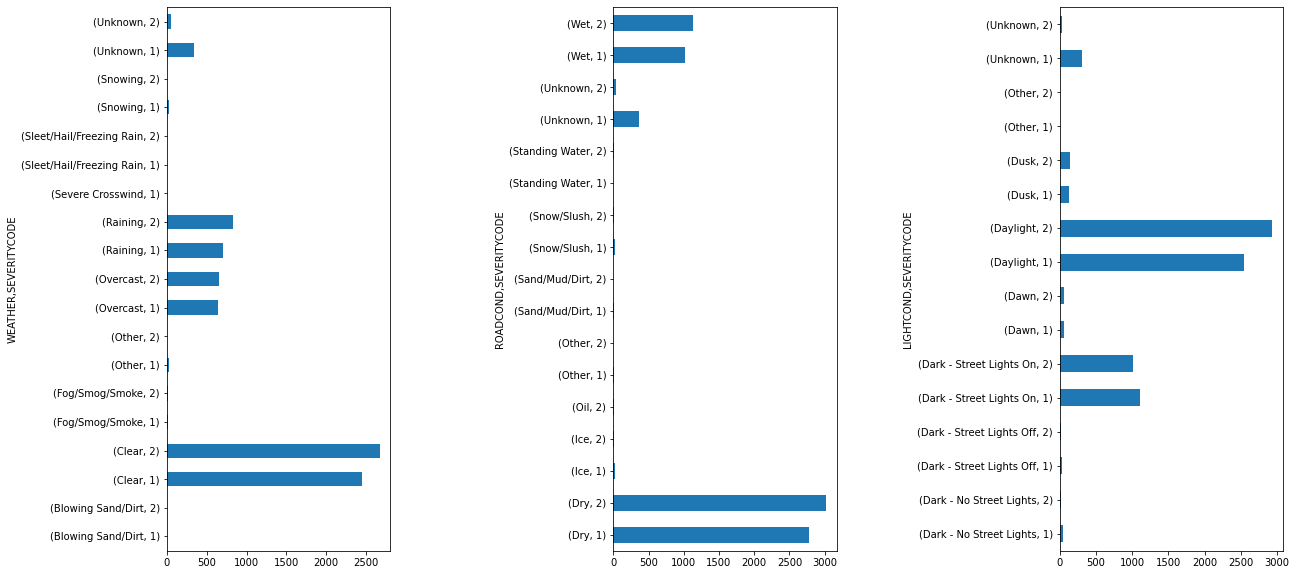

In [ ]:
ax = plt.subplots(3,1,figsize=(20,10))
plt.subplots_adjust(wspace=1)
plt.subplot(1,3,1)
equal_df.groupby(['WEATHER','SEVERITYCODE']).size().plot.barh()
plt.subplot(1,3,2)
equal_df.groupby(['ROADCOND','SEVERITYCODE']).size().plot.barh()
plt.subplot(1,3,3)
equal_df.groupby(['LIGHTCOND','SEVERITYCODE']).size().plot.barh()

Clear weather has the most number of accident, but that's because of the frequency of weather being clear higher. Next comes rainy and overcast which also follows the same frequency pattern. Though Weather Condition being an import feature, this data alone can't be conclusive. We need a relation in frequency of weather conditions to predict accident prone weather.

We can observe the same problem with the second plot. Dry and Wet road conditions have the highest accidents but it's because of the high frequency of both the conditions.

In [ ]:
equal_df['Datetime'] = pd.to_datetime(equal_df['INCDTTM'])
equal_df.Datetime

13089   2004-05-06 00:00:00
8945    2004-05-21 21:30:00
9582    2004-11-17 18:10:00
9652    2004-11-07 00:00:00
314     2019-07-07 20:16:00
                ...        
13827   2004-07-30 19:18:00
13838   2004-01-08 00:00:00
13839   2004-06-09 00:00:00
13842   2004-09-02 00:00:00
13844   2004-04-17 16:35:00
Name: Datetime, Length: 8516, dtype: datetime64[ns]

(array([2428.,  134.,  150.,   78.,   56.,   68.,  100.,  243.,  304.,
         295.,  272.,  276.,  386.,  380.,  392.,  452.,  495.,  528.,
         402.,  264.,  227.,  230.,  197.,  159.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

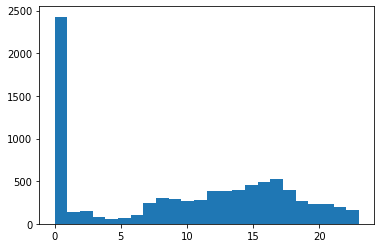

In [109]:
plt.hist(equal_df['Datetime'].dt.hour,bins=24)

Here, we see an interesting insight. We may think : "The highest number of accidents have occured between 00:00 am to 2:30 am. This is significant because even though the number of moving vehicles is way higher during the day,the number of accidents is more at late night. This may be due to various reasons like low light, low vision, carelessness, speeding, fatigue in driver, etc." But this is merely a problem with the data, as the entries with time not mentioned, automatically get labelled as 00:00:00.

So, the actual high accidents occur during 3:00 pm to 8:00 pm.

In [111]:
equal_df["ROADCOND"] = equal_df["ROADCOND"].astype('category')
equal_df["LIGHTCOND"] = equal_df["LIGHTCOND"].astype('category')
equal_df["WEATHER"] = equal_df["WEATHER"].astype('category')

equal_df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
OBJECTID                   int64
INCKEY                     int64
COLDETKEY                  int64
REPORTNO                  object
STATUS                    object
ADDRTYPE                  object
INTKEY                   float64
LOCATION                  object
EXCEPTRSNCODE             object
EXCEPTRSNDESC             object
SEVERITYCODE.1             int64
SEVERITYDESC              object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM                   object
JUNCTIONTYPE              object
SDOT_COLCODE             float64
SDOT_COLDESC              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                 category
ROADCOND                category
LIGHTCOND               category
PEDROWNOTG

In [113]:
equal_df["ROADCOND_cat"] = equal_df["ROADCOND"].cat.codes
equal_df["LIGHTCOND_cat"] = equal_df["LIGHTCOND"].cat.codes
equal_df["WEATHER_cat"] = equal_df["WEATHER"].cat.codes
equal_df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Datetime,ROADCOND_cat,LIGHTCOND_cat,WEATHER_cat
13089,1,-122.332812,47.605142,16575,30752,30752,1482601,Matched,Block,NaN,MARION ST BETWEEN 3RD AVE AND 4TH AVE,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2004/05/06 00:00:00+00,5/6/2004,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Y,0,Clear,Dry,Daylight,NaN,4127024.0,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N,2004-05-06 00:00:00,0,4,1
8945,1,-122.301170,47.551000,11197,24877,24877,1779329,Matched,Block,NaN,S ORCAS ST BETWEEN BEACON ER AVE S AND 25TH AVE S,NaN,NaN,1,Property Damage Only Collision,Other,2,0,0,1,2004/05/21 00:00:00+00,5/21/2004 9:30:00 PM,Mid-Block (but intersection related),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,0,Clear,Dry,Dark - Street Lights On,NaN,4142001.0,NaN,50,Fixed object,0.0,0.0,N,2004-05-21 21:30:00,0,2,1
9582,1,-122.346267,47.643021,12039,26582,26582,1783659,Matched,Block,NaN,6TH AVE N BETWEEN HALLADAY ST AND RAYE LOWER ST,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2004/11/17 00:00:00+00,11/17/2004 6:10:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Dry,Dark - Street Lights On,NaN,4322015.0,NaN,14,From same direction - both going straight - on...,0.0,0.0,N,2004-11-17 18:10:00,0,2,1
9652,1,-122.301179,47.618286,12132,25839,25839,1198376,Matched,Block,NaN,24TH AVE BETWEEN E HOWELL ST AND E DENNY WAY,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2004/11/07 00:00:00+00,11/7/2004,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,0,Unknown,Unknown,Unknown,NaN,4312004.0,NaN,32,One parked--one moving,0.0,0.0,N,2004-11-07 00:00:00,7,7,9
314,1,-122.313130,47.661269,354,320864,322364,E937614,Matched,Intersection,27062.0,UNIVERSITY WAY NE AND NE 45TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/07/07 00:00:00+00,7/7/2019 8:16:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N,2019-07-07 20:16:00,8,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,2,-122.313746,47.659802,17538,30632,30632,1793858,Matched,Block,NaN,NE 43RD ST BETWEEN BROOKLYN AVE NE AND UNIVERS...,NaN,NaN,2,Injury Collision,Pedestrian,3,1,0,1,2004/07/30 00:00:00+00,7/30/2004 7:18:00 PM,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Clear,Dry,Daylight,NaN,4212006.0,NaN,0,Vehicle going straight hits pedestrian,0.0,0.0,N,2004-07-30 19:18:00,0,4,1
13838,2,-122.370736,47.697328,17553,30417,30417,1773906,Matched,Block,NaN,HOLMAN RD NW BETWEEN 12TH AVE NW AND 11TH AVE NW,NaN,NaN,2,Injury Collision,Other,1,0,0,1,2004/01/08 00:00:00+00,1/8/2004,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4008011.0,Y,50,Fixed object,0.0,0.0,N,2004-01-08 00:00:00,8,2,4
13839,2,-122.355298,47.684748,17554,29622,29622,1794326,Matched,Intersection,24304.0,GREENWOOD AVE N AND N 77TH ST,NaN,NaN,2,Injury Collision,Left Turn,2,0,0,2,2004/06/09 00:00:00+00,6/9/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,4161014.0,NaN,28,From opposite direction - one left turn - one ...,0.0,0.0,N,2004-06-09 00:00:00,0,4,1
13842,2,-122.305703,47.6008

In [115]:
X = np.asarray(equal_df[['ROADCOND_cat','LIGHTCOND_cat','WEATHER_cat']])
X[0:5]

array([[0, 4, 1],
       [0, 2, 1],
       [0, 2, 1],
       [7, 7, 9],
       [8, 4, 5]], dtype=int8)

In [117]:
Y = np.asarray(equal_df[['SEVERITYCODE']])
Y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [119]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.65783317,  0.35905628, -0.69952377],
       [-0.65783317, -1.22731117, -0.69952377],
       [-0.65783317, -1.22731117, -0.69952377],
       [ 1.28416411,  2.73860744,  2.88479898],
       [ 1.5615923 ,  0.35905628,  1.0926376 ]])

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.28)
print("Training Data : ", X_train.shape,y_train.shape )
print("Test Data : ", X_test.shape, y_test.shape)

Training Data :  (6131, 3) (6131, 1)
Test Data :  (2385, 3) (2385, 1)


### **Building Models**

### K-Nearest Neighbours

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [149]:
Sum_of_squared_distances = []
K = range(10,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

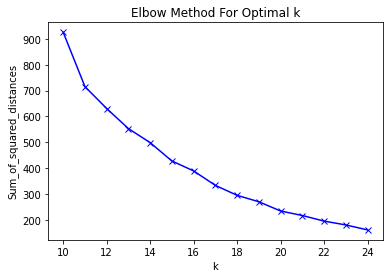

In [150]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [152]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
knn.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.5170445278094927

In [151]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
knn.score(X_train,y_train)
knn_yhat = knn.predict(X_test)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.5211740041928721

### Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(criterion="entropy",max_depth=11)
dtr.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [167]:
dtr_yhat = dtr.predict(X_test)
dtr.score(X_test,y_test)

0.5534591194968553

[Text(1083.3675166297119, 1302.375, 'LIGHTCOND <= 2.342\nentropy = 1.0\nsamples = 6131\nvalue = [3028, 3103]\nclass = 2'),
 Text(845.970066518847, 1189.125, 'WEATHER <= 1.317\nentropy = 0.999\nsamples = 5903\nvalue = [2821, 3082]\nclass = 2'),
 Text(527.3780487804878, 1075.875, 'LIGHTCOND <= -0.831\nentropy = 0.998\nsamples = 5776\nvalue = [2721, 3055]\nclass = 2'),
 Text(311.63248337028824, 962.625, 'WEATHER <= 0.869\nentropy = 1.0\nsamples = 1598\nvalue = [820, 778]\nclass = 1'),
 Text(190.22727272727275, 849.375, 'LIGHTCOND <= -1.624\nentropy = 0.997\nsamples = 1184\nvalue = [627, 557]\nclass = 1'),
 Text(108.25942350332595, 736.125, 'ROADCOND <= -0.103\nentropy = 0.975\nsamples = 118\nvalue = [70, 48]\nclass = 1'),
 Text(55.67627494456763, 622.875, 'LIGHTCOND <= -3.21\nentropy = 0.983\nsamples = 111\nvalue = [64, 47]\nclass = 1'),
 Text(24.745011086474502, 509.625, 'ROADCOND <= -0.797\nentropy = 0.995\nsamples = 59\nvalue = [32, 27]\nclass = 1'),
 Text(12.372505543237251, 396.375, 

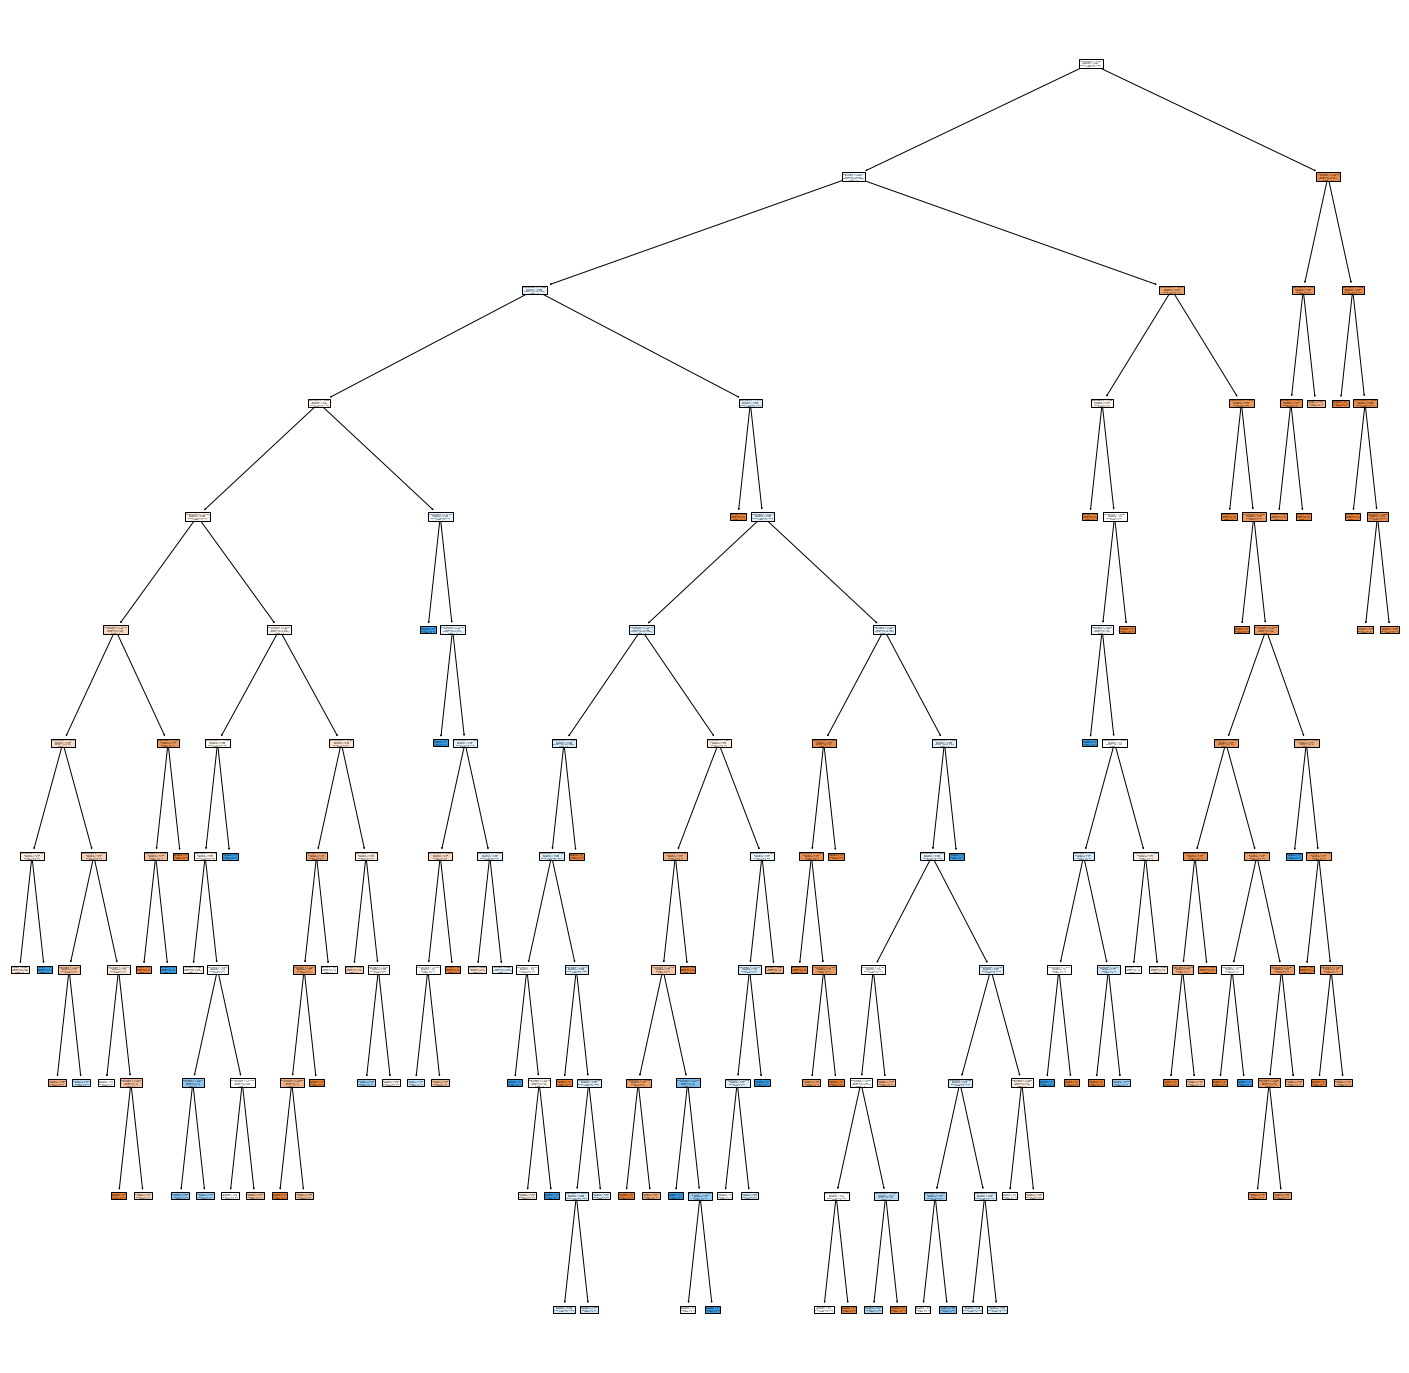

In [173]:
from sklearn import tree
fig = plt.figure(figsize=(25,25))
tree.plot_tree(dtr,feature_names=['ROADCOND','LIGHTCOND','WEATHER'],class_names=['1','2'],filled = True)

### Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lgr = LogisticRegression(C=7, solver='saga')
lgr.fit(X_train,y_train)
lgr.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5251998042733649

In [195]:
lgr_yhat = lgr.predict(X_test)
lgr.score(X_test,y_test)

0.5236897274633123

### **Evaluation of Models**

In [196]:
from sklearn.metrics import jaccard_score, f1_score, log_loss


K-Nearest Neighbours